In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
sns.set_style("darkgrid")

In [50]:
os.path

<module 'ntpath' from 'c:\\Python38\\lib\\ntpath.py'>

In [53]:
df = pd.read_csv('./Compliance_JVel_BVel_fullbody_leader_Org_.csv')
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\jointVel_bodyVel_3D_analysis.csv")
# df = pd.read_csv("C:\\Program Files\\CoppeliaRobotics\\CoppeliaSimEdu\\scenes\\SOLM\\Compliance_JVel_BVel_fullbody_leader_Org_.csv")
df.head()

Time (s)  JointVel_1_R1  JointVel_2_R1  JointVel_3_R1  JointVel_1_R2  \
0      1.00          0.225          0.062         -0.135          0.222   
1      1.01          0.640          0.157         -0.368          0.623   
2      1.02          0.879          0.135         -0.459          0.851   
3      1.03          0.985          0.100         -0.486          0.945   
4      1.04          1.001          0.089         -0.489          0.952   

   JointVel_2_R2  JointVel_3_R2  JointVel_1_L1  JointVel_2_L1  JointVel_3_L1  \
0         -0.047          0.134         -0.035         -0.005          0.094   
1         -0.141          0.383         -0.106         -0.004          0.262   
2         -0.231          0.545         -0.167          0.046          0.345   
3         -0.250          0.596         -0.212          0.062          0.401   
4         -0.201          0.560         -0.235          0.031          0.450   

   JointVel_1_L2  JointVel_2_L2  JointVel_3_L2  Body Vel X  Body Vel Y  \
0         -0.030         -0.098          0.010      -0.031      -0.004   
1         -0.090         -0.256          0.012      -0.065      -0.009   
2         -0.146         -0.255         -0.051      -0.084      -0.011   
3         -0.188         -0.213         -0.110      -0.093      -0.014   
4         -0.211         -0.181         -0.141      -0.095      -0.016   

   Body Vel Z  
0       0.007  
1       0.014  
2       0.016  
3       0.015  
4       0.012

In [27]:
# Filter out rows where Joint Vel 1, Joint Vel 2, and Joint Vel 3 are all zero
# df = df[~((abs(df["JointVel_1_R1"]) < 0.1) & 
#           (abs(df["JointVel_2_R1"]) < 0.1) & 
#           (abs(df["JointVel_3_R1"]) < 0.1) &
#           (abs(df["JointVel_1_R2"]) < 0.1) & 
#           (abs(df["JointVel_2_R2"]) < 0.1) &
#           (abs(df["JointVel_3_R2"]) < 0.1) &
#           (abs(df["JointVel_1_L1"]) < 0.1) & 
#           (abs(df["JointVel_2_L1"]) < 0.1) & 
#           (abs(df["JointVel_3_L1"]) < 0.1) &
#           (abs(df["JointVel_1_L2"]) < 0.1) & 
#           (abs(df["JointVel_2_L2"]) < 0.1) & 
#           (abs(df["JointVel_3_L2"]) < 0.1)
#           )]

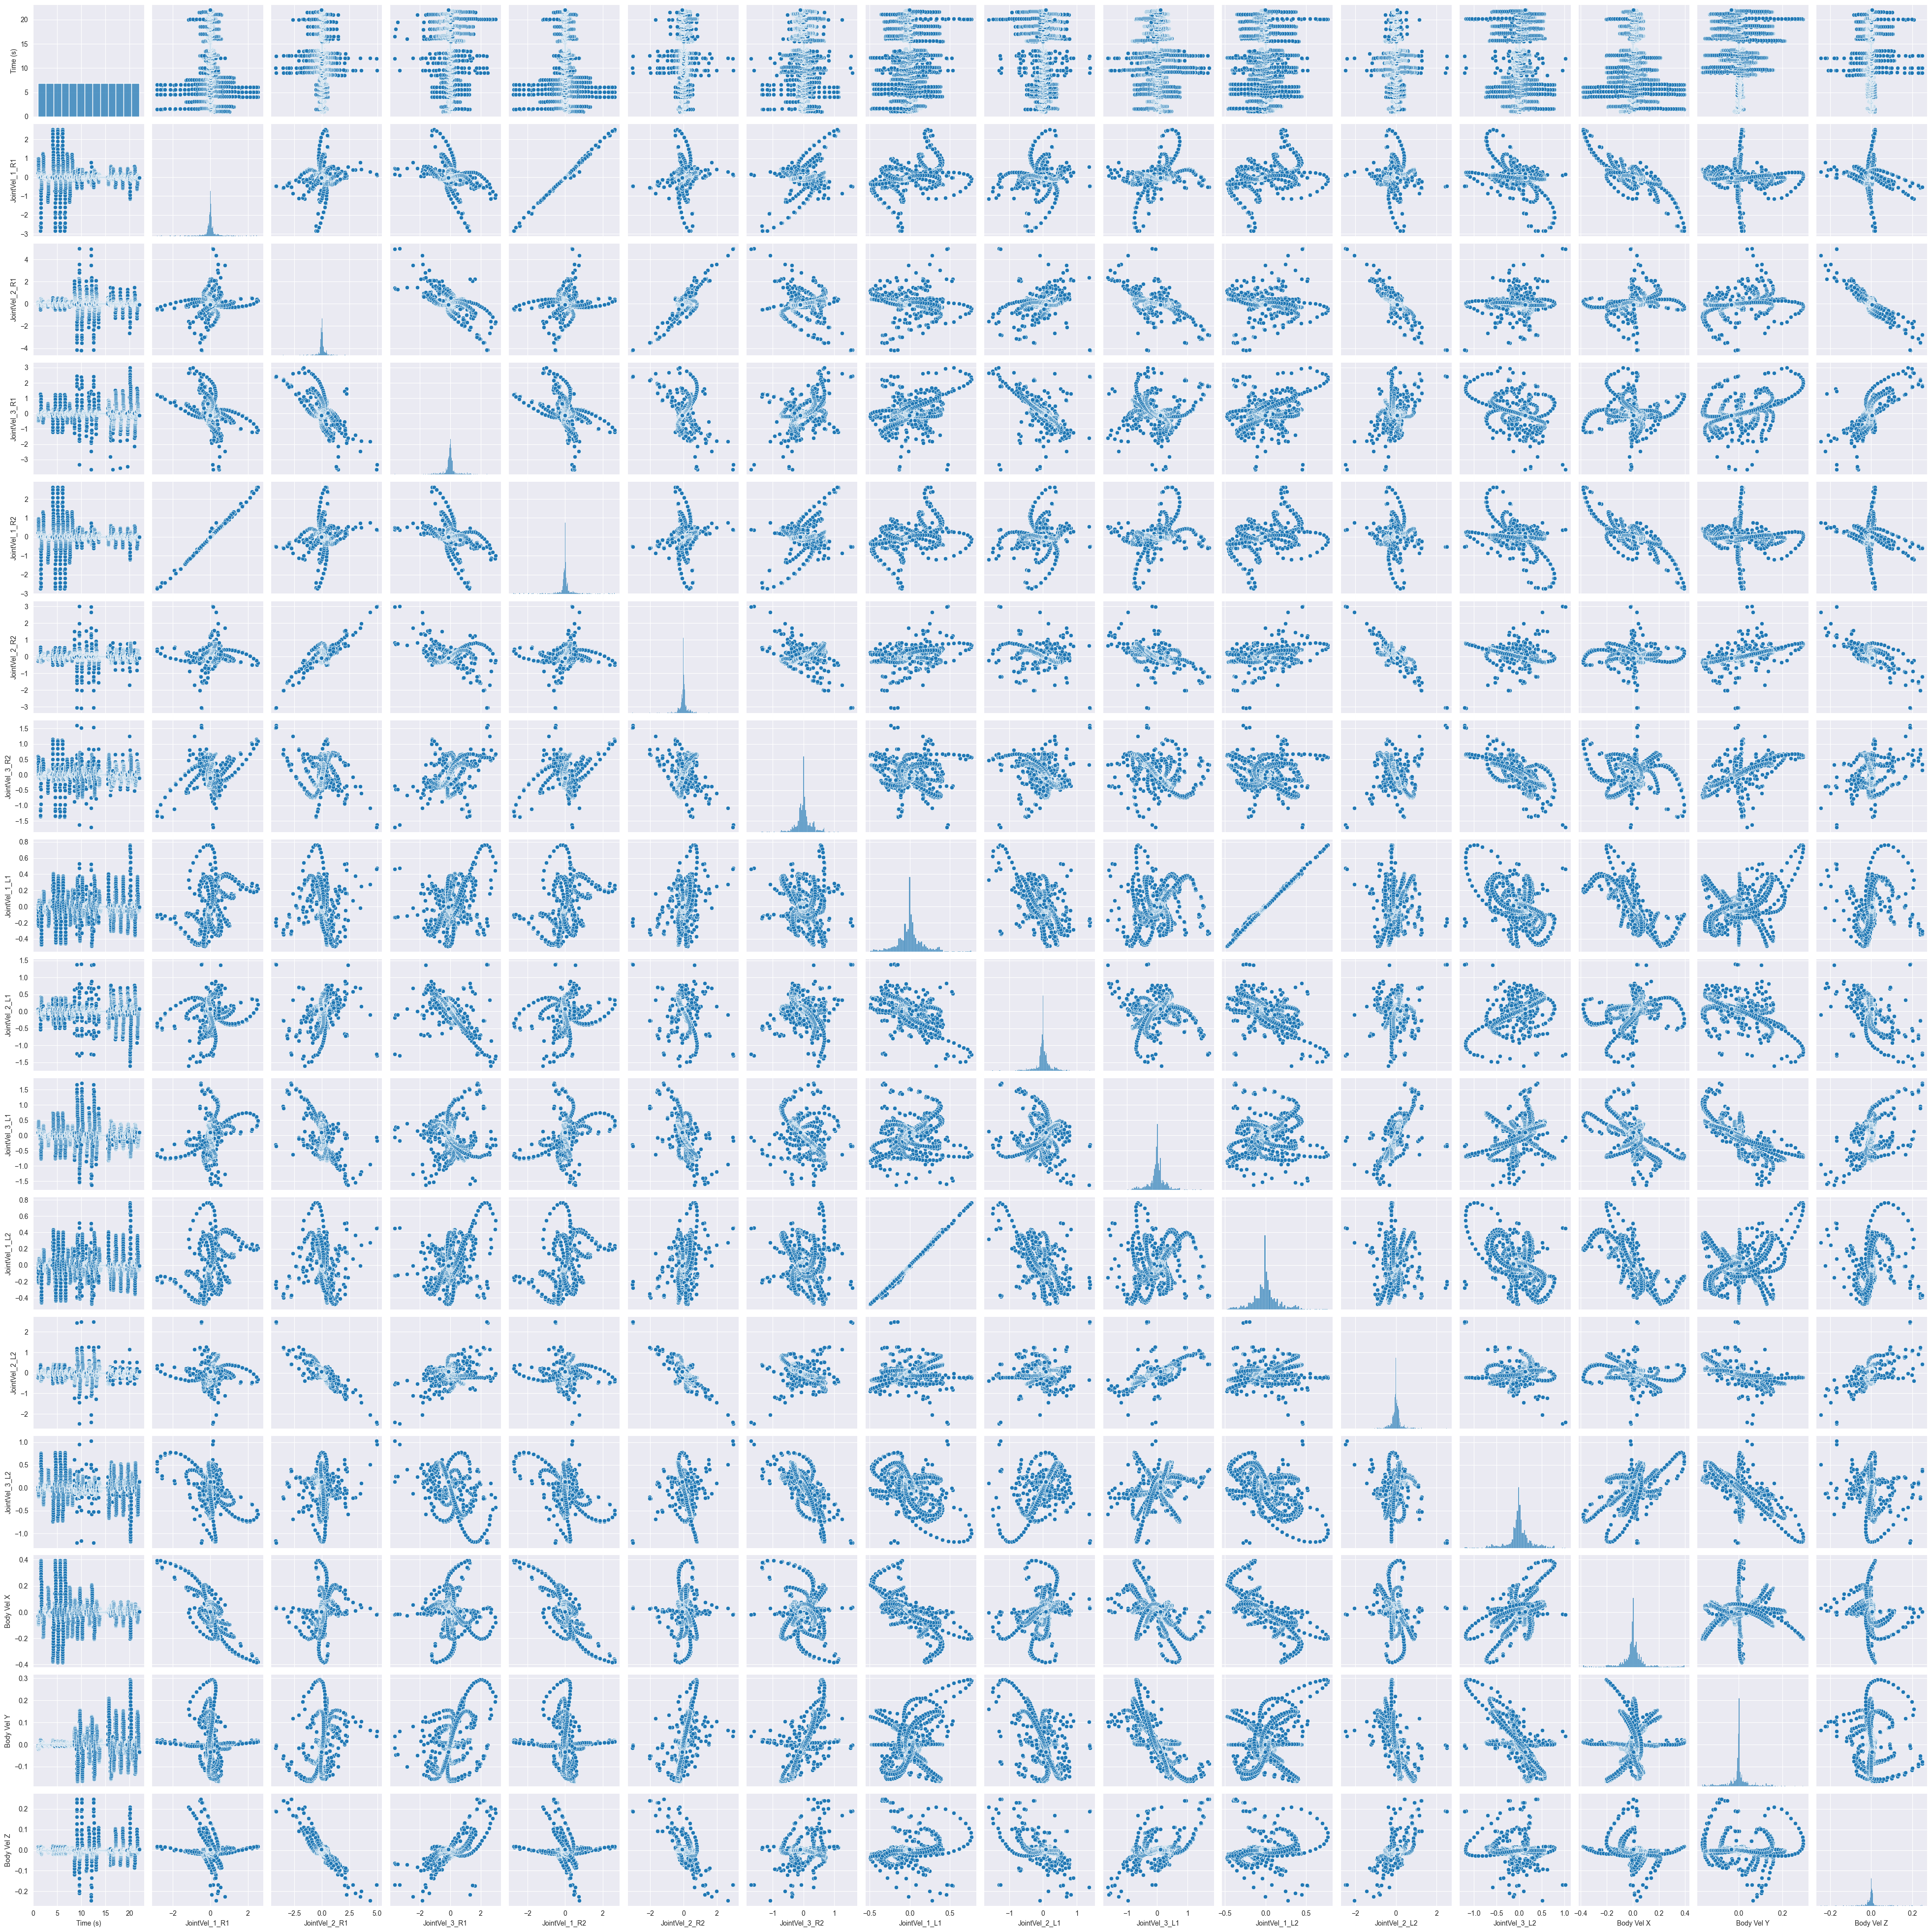

In [54]:
# independent joitn activation (calibrate data)
sns.pairplot(df)

In [23]:
df.columns

Index(['Time (s)', 'JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1',
       'JointVel_1_R2', 'JointVel_2_R2', 'JointVel_3_R2', 'JointVel_1_L1',
       'JointVel_2_L1', 'JointVel_3_L1', 'JointVel_1_L2', 'JointVel_2_L2',
       'JointVel_3_L2', 'Body Vel X', 'Body Vel Y', 'Body Vel Z'],
      dtype='object')

In [55]:
# Step 1: Melt the joint velocities into a single 'Joint Vel' column with a 'Joint Number'
df_joint_melt = df.melt(id_vars=['Time (s)'], 
                        value_vars=['JointVel_1_R1', 'JointVel_2_R1', 'JointVel_3_R1'],
                        var_name='Joint Number', 
                        value_name='Joint Vel')

# Extract the joint number from the column name and clean it up
df_joint_melt['Joint Number'] = df_joint_melt['Joint Number'].str.extract('(\d)').astype(int)

# Step 2: Melt the body velocities into a single 'Body Vel' column with an 'Axis'
df_body_melt = df.melt(id_vars=['Time (s)'], 
                       value_vars=['Body Vel X', 'Body Vel Y', 'Body Vel Z'],
                       var_name='Body Axis', 
                       value_name='Body Vel')

# Extract the axis from the column name and clean it up
df_body_melt['Body Axis'] = df_body_melt['Body Axis'].str.extract('([XYZ])')

# Step 3: Merge the two melted DataFrames back into one (on Time)
df_final = pd.merge(df_joint_melt, df_body_melt, on='Time (s)')

# Show the resulting DataFrame
df_final

Time (s)  Joint Number  Joint Vel Body Axis  Body Vel
0          1.00             1      0.225         X    -0.031
1          1.00             1      0.225         Y    -0.004
2          1.00             1      0.225         Z     0.007
3          1.00             2      0.062         X    -0.031
4          1.00             2      0.062         Y    -0.004
...         ...           ...        ...       ...       ...
18895     21.99             2     -0.068         Y    -0.034
18896     21.99             2     -0.068         Z     0.004
18897     21.99             3     -0.121         X     0.003
18898     21.99             3     -0.121         Y    -0.034
18899     21.99             3     -0.121         Z     0.004

[18900 rows x 5 columns]

C:\Users\binggwong\AppData\Local\Temp\ipykernel_31192\4220753205.py:5: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
C:\Users\binggwong\AppData\Local\Temp\ipykernel_31192\4220753205.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


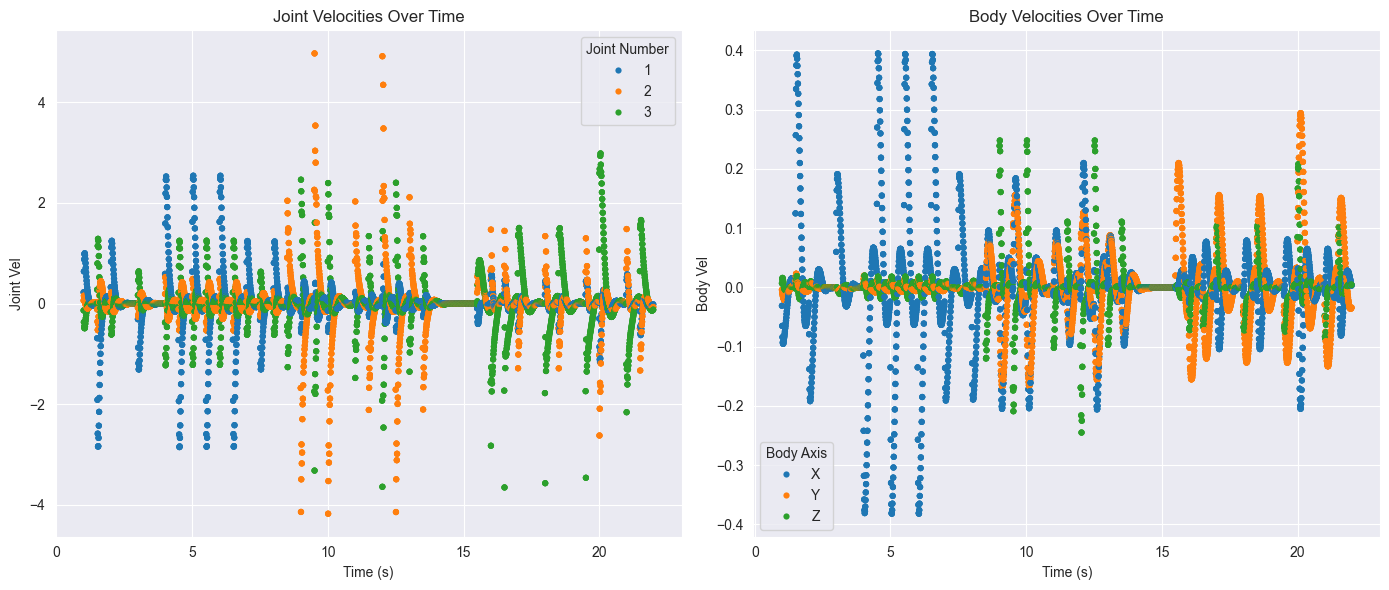

In [56]:
# Create a figure with two subplots (left and right)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First relational plot (left)
sns.scatterplot(
    x='Time (s)', y='Joint Vel', hue='Joint Number', data=df_final, ax=axes[0], palette=sns.color_palette(),edgecolor='none', s=20
)
axes[0].set_title('Joint Velocities Over Time')

# Second relational plot (right)
sns.scatterplot(
    x='Time (s)', y='Body Vel', hue='Body Axis', data=df_final, ax=axes[1], palette=sns.color_palette(), edgecolor='none', s=20 
)
axes[1].set_title('Body Velocities Over Time')

# Adjust layout to avoid overlap
plt.tight_layout()
# Show the combined plots
plt.show()

In [59]:
# Define X (input features) and Y (output labels) in a generalized way
X = df[["JointVel_1_R1", "JointVel_2_R1", "JointVel_3_R1"]].values  # Input: Joint velocities
Y = df[["Body Vel X", "Body Vel Y", "Body Vel Z"]].values      # Output: Body velocities

# Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
W = np.linalg.inv(X.T @ X) @ X.T @ Y

# Print the estimated weights (Jacobian matrix)
print("Estimated Jacobian Matrix (W):")
print(W)

Estimated Jacobian Matrix (W):
[[-0.19661848  0.03760351  0.00281658]
 [ 0.02724542  0.11456492 -0.04710373]
 [-0.05076904  0.14051955  0.01577075]]


In [60]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
sum_joint_contr = np.sum(abs(W), axis=0, keepdims=True) + epsilon
print(sum_joint_contr)

# Perform the division safely
W_normalized = W / sum_joint_contr

# Print the result
print("Normalize Jacobian Matrix (W):")
print(W_normalized)


[[0.27463295 0.29268799 0.06569107]]
Normalize Jacobian Matrix (W):
[[-0.71593186  0.12847643  0.0428761 ]
 [ 0.09920668  0.39142338 -0.71704929]
 [-0.18486142  0.48010016  0.24007446]]


### All legs weight estimation

In [80]:
Weights = []
# Define X (input features) and Y (output labels) in a generalized way
leg_label = ['R1', 'R2', 'L1', 'L2']
for i in range(4):
    X = df[["JointVel_1_"+leg_label[i], "JointVel_2_"+leg_label[i], "JointVel_3_"+leg_label[i]]].values  # Input: Joint velocities
    Y = df[["Body Vel X", "Body Vel Y", "Body Vel Z"]].values      # Output: Body velocities

    # Solve the linear regression using the normal equation: W = (X.T X)^(-1) X.T Y
    W = np.linalg.inv(X.T @ X) @ X.T @ Y

    Weights.append(W)

# Print the estimated weights (Jacobian matrix)
for i in range(4):
    print("Estimated Jacobian Matrix (W) number {}: ".format(i+1))
    print(Weights[i])
    print('-----')

Estimated Jacobian Matrix (W) number 1: 
[[-0.19661848  0.03760351  0.00281658]
 [ 0.02724542  0.11456492 -0.04710373]
 [-0.05076904  0.14051955  0.01577075]]
-----
Estimated Jacobian Matrix (W) number 2: 
[[-0.1753859  -0.05419226 -0.01317927]
 [ 0.01699686  0.13451103 -0.06913239]
 [ 0.03274618  0.18553531  0.02320225]]
-----
Estimated Jacobian Matrix (W) number 3: 
[[-0.44078266  0.03370395 -0.06584035]
 [-0.05174113 -0.11913652 -0.08026363]
 [-0.11683711 -0.13992201  0.04743493]]
-----
Estimated Jacobian Matrix (W) number 4: 
[[-0.33724769 -0.01699565 -0.02431065]
 [-0.06348983 -0.11703902  0.07290306]
 [ 0.11955201 -0.16370769 -0.02875888]]
-----


In [92]:
# Add a small epsilon to avoid division by zero
epsilon = 1e-8  # Small value to prevent division by zero

# Compute the maximum along the columns, but add epsilon to prevent division by zero
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(W_normalized)
    print('-------')


[[0.27463295 0.29268799 0.06569107]]
Normalize Jacobian Matrix (W) 1 :
[[-0.71593186  0.12847643  0.0428761 ]
 [ 0.09920668  0.39142338 -0.71704929]
 [-0.18486142  0.48010016  0.24007446]]
-------
[[0.22512895 0.3742386  0.10551392]]
Normalize Jacobian Matrix (W) 2 :
[[-0.77904641 -0.1448067  -0.1249055 ]
 [ 0.07549835  0.35942584 -0.6551969 ]
 [ 0.1454552   0.49576743  0.21989751]]
-------
[[0.60936091 0.2927625  0.19353892]]
Normalize Jacobian Matrix (W) 3 :
[[-0.72335237  0.11512387 -0.34019176]
 [-0.08491049 -0.40693914 -0.41471572]
 [-0.19173713 -0.47793695  0.24509247]]
-------
[[0.52028954 0.29774237 0.12597261]]
Normalize Jacobian Matrix (W) 4 :
[[-0.64819234 -0.05708172 -0.19298365]
 [-0.12202788 -0.39308822  0.57872154]
 [ 0.22977977 -0.54983003 -0.22829473]]
-------


In [103]:
w_ref = np.array([[-0.71593186,  0.12847643,  0.0428761 ],
                    [ 0.09920668,  0.39142338, -0.71704929],
                    [-0.18486142,  0.48010016,  0.24007446]])
W_norm = []
for i in range(4):
    sum_joint_contr = np.sum(abs(Weights[i]), axis=0, keepdims=True) + epsilon
    print(sum_joint_contr)

    # Perform the division safely
    W_normalized = Weights[i] / sum_joint_contr
    W_norm.append(W_normalized)

    # Print the result
    print("Normalize Jacobian Matrix (W) {} :".format(i+1))
    print(w_ref-W_normalized)
    print('-------')

[[0.27463295 0.29268799 0.06569107]]
Normalize Jacobian Matrix (W) 1 :
[[ 2.63063127e-09 -3.49899040e-09  2.53192128e-09]
 [ 3.84383123e-10  4.37850350e-09 -1.80562620e-09]
 [ 1.34151509e-09  3.28656297e-09 -2.10984999e-09]]
-------
[[0.22512895 0.3742386  0.10551392]]
Normalize Jacobian Matrix (W) 2 :
[[ 0.06311455  0.27328313  0.1677816 ]
 [ 0.02370833  0.03199754 -0.06185239]
 [-0.33031662 -0.01566727  0.02017695]]
-------
[[0.60936091 0.2927625  0.19353892]]
Normalize Jacobian Matrix (W) 3 :
[[ 0.00742051  0.01335256  0.38306786]
 [ 0.18411717  0.79836252 -0.30233357]
 [ 0.00687571  0.95803711 -0.00501801]]
-------
[[0.52028954 0.29774237 0.12597261]]
Normalize Jacobian Matrix (W) 4 :
[[-0.06773952  0.18555815  0.23585975]
 [ 0.22123456  0.7845116  -1.29577083]
 [-0.41464119  1.02993019  0.46836919]]
-------


In [104]:
W_norm

[array([[-0.71593186,  0.12847643,  0.0428761 ],
        [ 0.09920668,  0.39142338, -0.71704929],
        [-0.18486142,  0.48010016,  0.24007446]]),
 array([[-0.77904641, -0.1448067 , -0.1249055 ],
        [ 0.07549835,  0.35942584, -0.6551969 ],
        [ 0.1454552 ,  0.49576743,  0.21989751]]),
 array([[-0.72335237,  0.11512387, -0.34019176],
        [-0.08491049, -0.40693914, -0.41471572],
        [-0.19173713, -0.47793695,  0.24509247]]),
 array([[-0.64819234, -0.05708172, -0.19298365],
        [-0.12202788, -0.39308822,  0.57872154],
        [ 0.22977977, -0.54983003, -0.22829473]])]

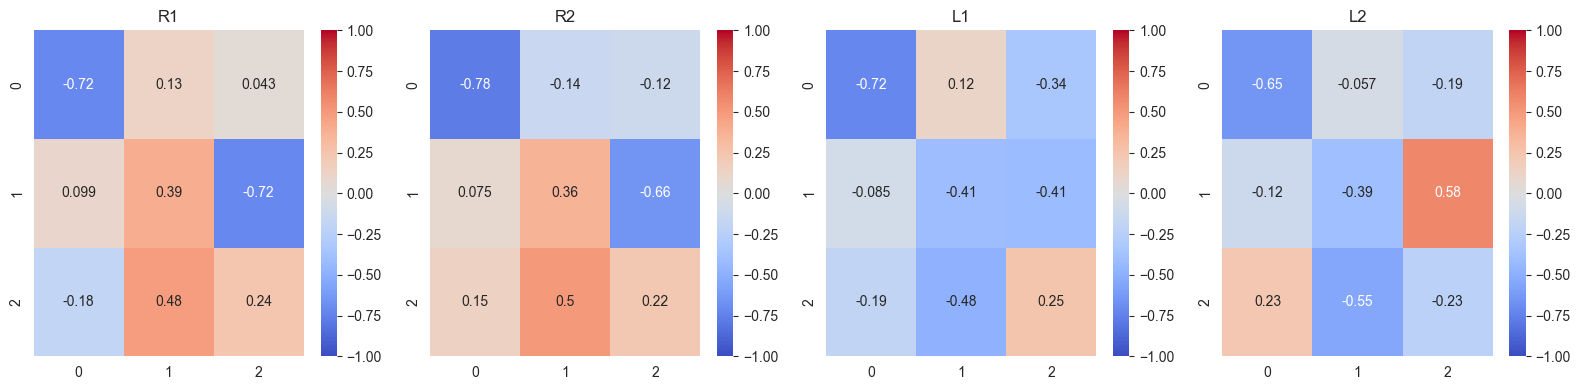

In [107]:
# Store matrices in a list for easier plotting
# matrices = [matrix1, matrix2, matrix3, matrix4]
titles = ["Matrix 1", "Matrix 2", "Matrix 3", "Matrix 4"]

# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Loop over each matrix and plot it as a heatmap
for i, (matrix, title) in enumerate(zip(W_norm, leg_label)):
    sns.heatmap(matrix, annot=True, cmap='coolwarm', center=0, ax=axes[i], 
                vmin=-1, vmax=1, cbar=True)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

In [198]:
# Prediction for new joint velocities (optional)
new_joint_velocities = np.array([[1.0, 0.0, 0.0]])  # Example input
predicted_body_velocities = new_joint_velocities @ W
print("\nPredicted Body Velocities for new joint velocities:")
print(predicted_body_velocities)



Predicted Body Velocities for new joint velocities:
[[-0.28836441 -0.00059568  0.        ]]


In [139]:
df['Body Vel X'], df['Body Vel Y'], df['Body Vel Z']

(0     -0.000
 1     -0.260
 2     -0.488
 3     -0.610
 4     -0.621
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel X, Length: 903, dtype: float64,
 0     -0.000
 1     -0.001
 2     -0.011
 3     -0.025
 4     -0.039
        ...  
 898    0.000
 899    0.000
 900    0.000
 901    0.000
 902    0.000
 Name: Body Vel Y, Length: 903, dtype: float64,
 0     -0.0
 1     -0.0
 2     -0.0
 3     -0.0
 4     -0.0
       ... 
 898   -0.0
 899   -0.0
 900   -0.0
 901   -0.0
 902   -0.0
 Name: Body Vel Z, Length: 903, dtype: float64)

In [140]:
# Generate synthetic data
# X is the input matrix with shape (n_samples, 3), where n_samples = 100
np.random.seed(42)
n_samples = 100
X = np.random.rand(n_samples, 3)

# Define a true weight matrix W_true and bias b_true for generating outputs
W_true = np.array([[2, -1, 0.5],
                   [1.5, 2, -0.5],
                   [1, 0, 1]])

b_true = np.array([1, 2, 3])

# Generate outputs Y using the linear relationship Y = XW_true + b_true
Y = X @ W_true + b_true

# Linear regression solution using normal equation
# Adding a column of ones to X for the bias term
X_b = np.hstack([X, np.ones((n_samples, 1))])

# Solve for the weights and bias using normal equation: W = (X_b.T X_b)^(-1) X_b.T Y
W_b = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

# Extract the weight matrix W and bias vector b from the result
W_est = W_b[:-1, :]  # First 3 rows are weights
b_est = W_b[-1, :]   # Last row is the bias

# Output the estimated weights and bias
print("Estimated weight matrix W:")
print(W_est)

print("\nEstimated bias vector b:")
print(b_est)

# Compare with the true weights and bias
print("\nTrue weight matrix W_true:")
print(W_true)

print("\nTrue bias vector b_true:")
print(b_true)


Estimated weight matrix W:
[[ 2.00000000e+00 -1.00000000e+00  5.00000000e-01]
 [ 1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [ 1.00000000e+00 -1.45678929e-15  1.00000000e+00]]

Estimated bias vector b:
[1. 2. 3.]

True weight matrix W_true:
[[ 2.  -1.   0.5]
 [ 1.5  2.  -0.5]
 [ 1.   0.   1. ]]

True bias vector b_true:
[1 2 3]


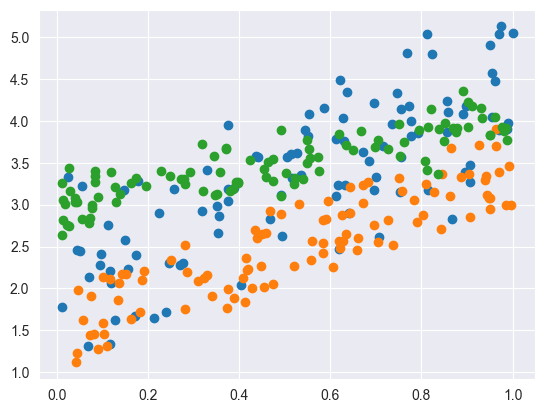

In [141]:
X_new = np.random.rand(100, 3)  # New input sample
Y_pred = X_new @ W_est + b_est

for i in range(3):
    # plt.scatter(X[:,i], Y[:,i])
    plt.scatter(X_new[:,i], Y_pred[:,i])